In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 🎯 2. Load Dataset
df = pd.read_csv("customer_reviews_large.csv")  # Replace with your path if needed
df

,Customer_ID,Product_ID,Review_Text,Rating,Sentiment,Monthly_Sales
0,1001,P005,Very disappointed.,1,Negative,76
1,1002,P005,Amazing performance.,5,Positive,547
2,1003,P002,Very disappointed.,1,Negative,51
3,1004,P001,Terrible experience.,1,Negative,76
4,1005,P005,Okay for the price.,3,Neutral,222
...,...,...,...,...,...,...
995,1996,P002,Okay for the price.,2,Neutral,256
996,1997,P005,Average product.,3,Neutral,287
997,1998,P005,Okay for the price.,2,Neutral,297
998,1999,P002,It’s fine.,3,Neutral,223


In [3]:
# 🧹 3. Data Cleaning & Exploration
df.drop_duplicates(inplace=True)
print(df.isnull().sum())
print(df.describe())

Customer_ID      0
Product_ID       0
Review_Text      0
Rating           0
Sentiment        0
Monthly_Sales    0
dtype: int64
       Customer_ID       Rating  Monthly_Sales
count  1000.000000  1000.000000    1000.000000
mean   1500.500000     2.879000     415.921000
std     288.819436     1.367563     278.240508
min    1001.000000     1.000000      50.000000
25%    1250.750000     2.000000     170.750000
50%    1500.500000     3.000000     361.000000
75%    1750.250000     4.000000     632.250000
max    2000.000000     5.000000    1000.000000


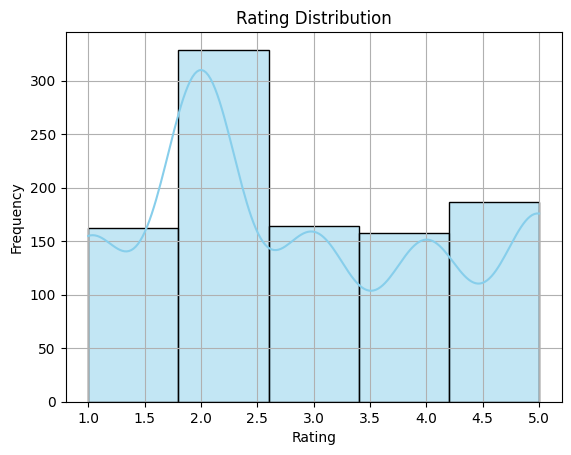

In [4]:
# 📊 Visual: Rating Distribution
sns.histplot(df['Rating'], bins=5, kde=True, color='skyblue')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\chira\AppData\Local\Temp\ipykernel_7980\1871637298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='Set2')


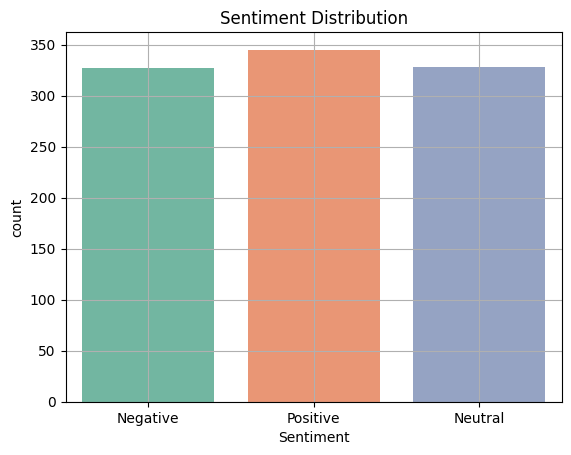

In [5]:
# 📊 Visual: Sentiment Count
sns.countplot(data=df, x='Sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.grid(True)
plt.show()

In [6]:
# 🔧 4. Feature Engineering
le = LabelEncoder()
df['Product_ID'] = le.fit_transform(df['Product_ID'])
df['Sentiment'] = le.fit_transform(df['Sentiment'])  # Positive=2, Neutral=1, Negative=0

# Convert Review_Text to TF-IDF features
tfidf = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf.fit_transform(df['Review_Text']).toarray()
tfidf_df = pd.DataFrame(tfidf_matrix, columns=tfidf.get_feature_names_out())

# Combine TF-IDF features with other features
df_model = pd.concat([df.drop(['Review_Text'], axis=1), tfidf_df], axis=1)

In [7]:
# 🎯 5. Define X and y
X = df_model.drop('Monthly_Sales', axis=1)
y = df_model['Monthly_Sales']

In [8]:
# ✂️ 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 🤖 7. Train Models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
# 🧪 8. Evaluation
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"\n{name} R² Score: {r2:.2f}")
    print(f"{name} RMSE: {rmse:.2f}")
    return y_pred

y_pred_lr = evaluate_model(lr, "Linear Regression")
y_pred_rf = evaluate_model(rf, "Random Forest")


Linear Regression R² Score: 0.86
Linear Regression RMSE: 102.85

Random Forest R² Score: 0.85
Random Forest RMSE: 108.27


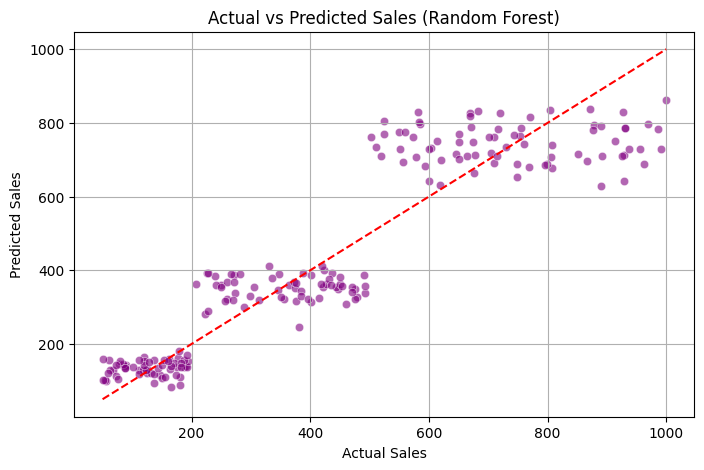

In [11]:
# 📈 9. Visual: Actual vs Predicted (Random Forest)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title("Actual vs Predicted Sales (Random Forest)")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.grid(True)
plt.show()

C:\Users\chira\AppData\Local\Temp\ipykernel_7980\189061728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='Blues_r')


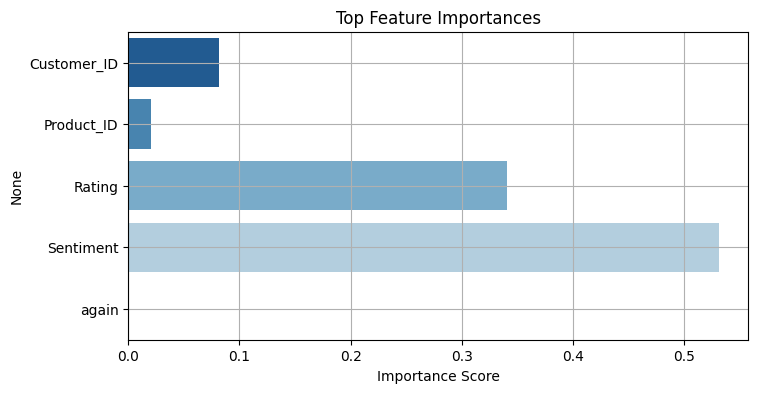

In [12]:
# 🌡️ 10. Visual: Feature Importance (Random Forest)
importances = rf.feature_importances_[:5]  # show top 5 manually added features
feature_names = X.columns[:5]

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, palette='Blues_r')
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.grid(True)
plt.show()

In [13]:
import joblib

# Save models
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(lr, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

In [14]:
# Load models
loaded_rf = joblib.load('random_forest_model.pkl')
loaded_lr = joblib.load('linear_regression_model.pkl')

# Predict with loaded model
predicted = loaded_rf.predict(X_test)

In [15]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']